# Regressão 01 - tarefa 01

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [51]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [52]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
reg_tip = smf.ols('tip ~ net_bill', data=tips).fit()
print(reg_tip.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           5.02e-23
Time:                        01:26:45   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

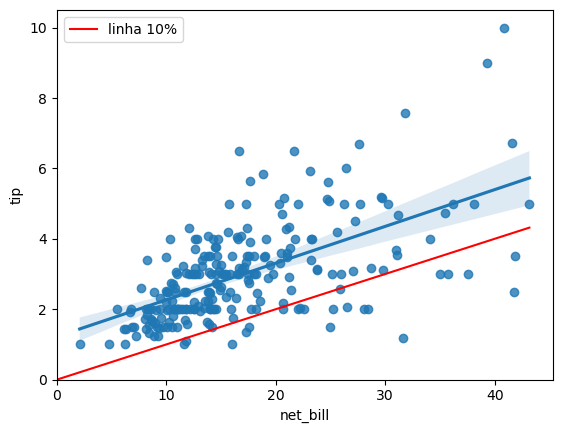

In [53]:
x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1 * x
sns.regplot(y='tip', x='net_bill', data=tips[tips['tip_pct'] < 0.5])
plt.plot(x, y, '-r', label='linha 10%')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

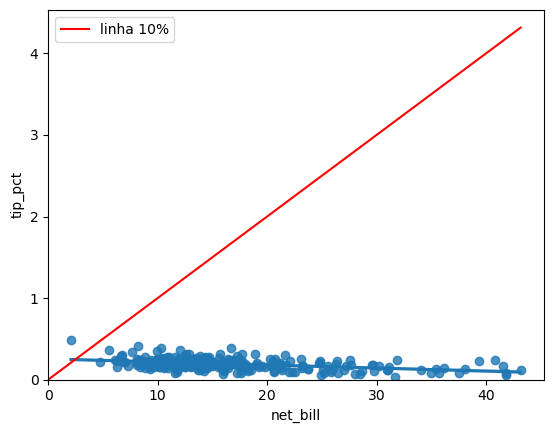

In [54]:
# Gráfico de dispersão com linha de regressão
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct'] < 0.5])
plt.plot(x, y, '-r', label='linha 10%')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

- O primeiro modelo indica que gorjetas maiores acompanham contas mais altas.

- O segundo modelo mostra que a porcentagem da gorjeta diminui à medida que a conta aumenta.

- Comparar os R² dos modelos não é direto, pois eles analisam aspectos diferentes da gorjeta.

- Quanto maior o valor gasto na mesa menor a porcentagem da gorgeta, e o R2 e menor no segundo grafico

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [55]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()
pred_tip_pct = reg_tip_pct.fittedvalues
pred_tip = pred_tip_pct * tips['net_bill']
ss_res = sum((tips['tip'] - pred_tip) ** 2)
ss_tot = sum((tips['tip'] - tips['tip'].mean()) ** 2)
r_squared_tip = 1 - (ss_res / ss_tot)
print(f'R^2 tip_pct: {reg_tip_pct.rsquared}')
print(f'R^2 tip: {r_squared_tip}')

R^2 tip_pct: 0.09129084920662967
R^2 tip: 0.10889974845461414
